In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
# from tools import procesar_precios_bonos
import tools as tools

In [2]:
# Estilo
plt.style.use('dark_background')

In [3]:
# Fecha de análisis
fecha_analisis = pd.to_datetime('2025-10-01')

In [4]:
### Import the csv files with the data while indexing first column as date

##########################################################################################
curvaESTR = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\curvaESTR.csv', sep=';', index_col=0, parse_dates=True)
##########################################################################################
precios_historicos_universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_universo.csv', sep=';')
## Rename first column to Date
precios_historicos_universo = precios_historicos_universo.rename(columns={'Unnamed: 0': 'Date'})
### Set Date as index
precios_historicos_universo = precios_historicos_universo.set_index('Date')
### Transpose the DataFrame to have timeseries in rows and assets in columns
precios_historicos_universo = precios_historicos_universo.T
##########################################################################################
precios_historicos_varios = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_varios.csv', sep=';', index_col=0, parse_dates=True)
##########################################################################################
universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\universo.csv', sep=';', index_col=0, parse_dates=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_48956\103423249.py:6: DtypeWarning: Columns (2,3,4,5,6,9,10,11,12,13,16,17,18,19,20,23,24,25,26,27,30,31,32,33,34,37,38,39,40,41,44,45,46,47,48,51,52,53,54,55,58,59,60,61,62,65,66,67,68,75,89,90,185,219,240,248,275,319,331,415,454,458,473,563,564,565,571,572,573,576,577,578,580,583,604,695) have mixed types. Specify dtype option on import or set low_memory=False.
  precios_historicos_universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_universo.csv', sep=';')
C:\Users\javie\AppData\Local\Temp\ipykernel_48956\103423249.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Local

### <font color=#336699>1. Datos</font>

<style>.gray {background-color: #595959}

</style><div class="gray">❕💬¿Qué observas en los datos? Analiza la información que tenemos del universo</div>

Haz un primer análisis visual de la información que tenemos del universo de bono.
Entre otras, plantéate cuestiones como:
- ¿Divisas?
- ¿Tipo de bonos? ¿Fijo/Flotante? ¿Prelación? ¿Opcionalidad? ¿Hay bonos perpetuos?
- ¿Sectores? ¿Emisores? Si invirtéramos en todos los bonos, ¿dirías a priori que la cartera está diversificada?
- ¿Ratings? (Riesgo de crédito)
- ¿Otros datos cuantitativos?
    - Riesgo de liquidez - Horquillas y nominal vivo
- ¿Hay *gaps* en la información que vamos a tener que tratar?

In [5]:
# universo.columns
# # universo['Coupon Type'].unique()
# universo['Callable'].unique()
# # universo['Seniority'].unique()
# # universo['Ccy'].unique()
# universo['Rating'].unique()
# # universo['Industry Sector'].unique()
# universo['Rating'].unique()
# universo['Rating'].unique()
# universo['Rating'].unique()
# universo['PD 1YR'].unique()
'Todos los bonos son en euros por lo que no tendremos riesgo divisa ni necesidad de normalizar precios.'


'La mayoría de los bonos son bullet, por lo que no tendremos en cuenta opciones de call o put.'


'A nivel sectorial, casi el 50% de los bonos son del sector Financiero, en línea con los niveles de emisión globales. El segundo sector más representado es el de Consumo Básico y posteriormente el Industrial.Los sectores cíclicos representan el 68% del principal total del universo.'


'El 15% de los bonos (18% por principal) son flotantes, por lo que a efectos prácticos tienen duración 0 Esto puede ser interesante para incluirlos en la cartera por la restricción de 3 años.'

'Los bonos callable representan el 27% de los bonos y el 30% del principal.'

'El 75% de los bonos son Senior Unsecured. Los subordinados representan el 8%. Un 10% son 1st lien / secured / Sr. preferred'

'A nivel de rating, el 50% de la emisión se encuentra entre A- y BBB. el 82% son Investment Grade o superior. El 90% de los que no lo son no tienen rating oficial, quizás simplemente porque no quieren asumir el coste de obtenerlo.'



'A nivel de rating, el 50% de la emisión se encuentra entre A- y BBB. el 82% son Investment Grade o superior. El 90% de los que no lo son no tienen rating oficial, quizás simplemente porque no quieren asumir el coste de obtenerlo.'

#### <font color=#808080>Divisas</font>

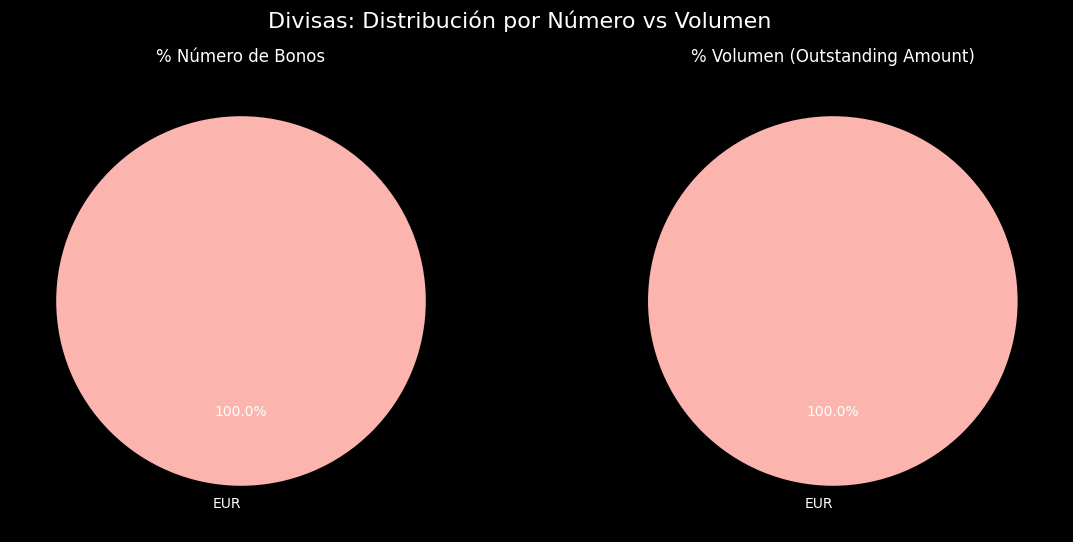

In [6]:
# --- DIVISAS: Conteo vs Volumen ---

# 1. Preparar datos agregados
df_ccy = universo.groupby('Ccy').agg({
    'Description': 'count',          # Conteo de bonos
    'Outstanding Amount': 'sum'      # Suma de nominales
}).rename(columns={'Description': 'Count', 'Outstanding Amount': 'Volume'})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Divisas: Distribución por Número vs Volumen', fontsize=16)

# Gráfico A: Porcentaje de Bonos (Count)
df_ccy['Count'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='Pastel1', ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Gráfico B: Porcentaje de Dinero (Volume)
df_ccy['Volume'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Pastel1', ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amount)')

plt.show()

#### <font color=#808080>Distribución Sectorial</font>


C:\Users\javie\AppData\Local\Temp\ipykernel_48956\3076987439.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sector_pct['Count %'], y=df_sector_pct.index, ax=axes[0], palette='viridis')
C:\Users\javie\AppData\Local\Temp\ipykernel_48956\3076987439.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sector_pct['Volume %'], y=df_sector_pct.index, ax=axes[1], palette='viridis')


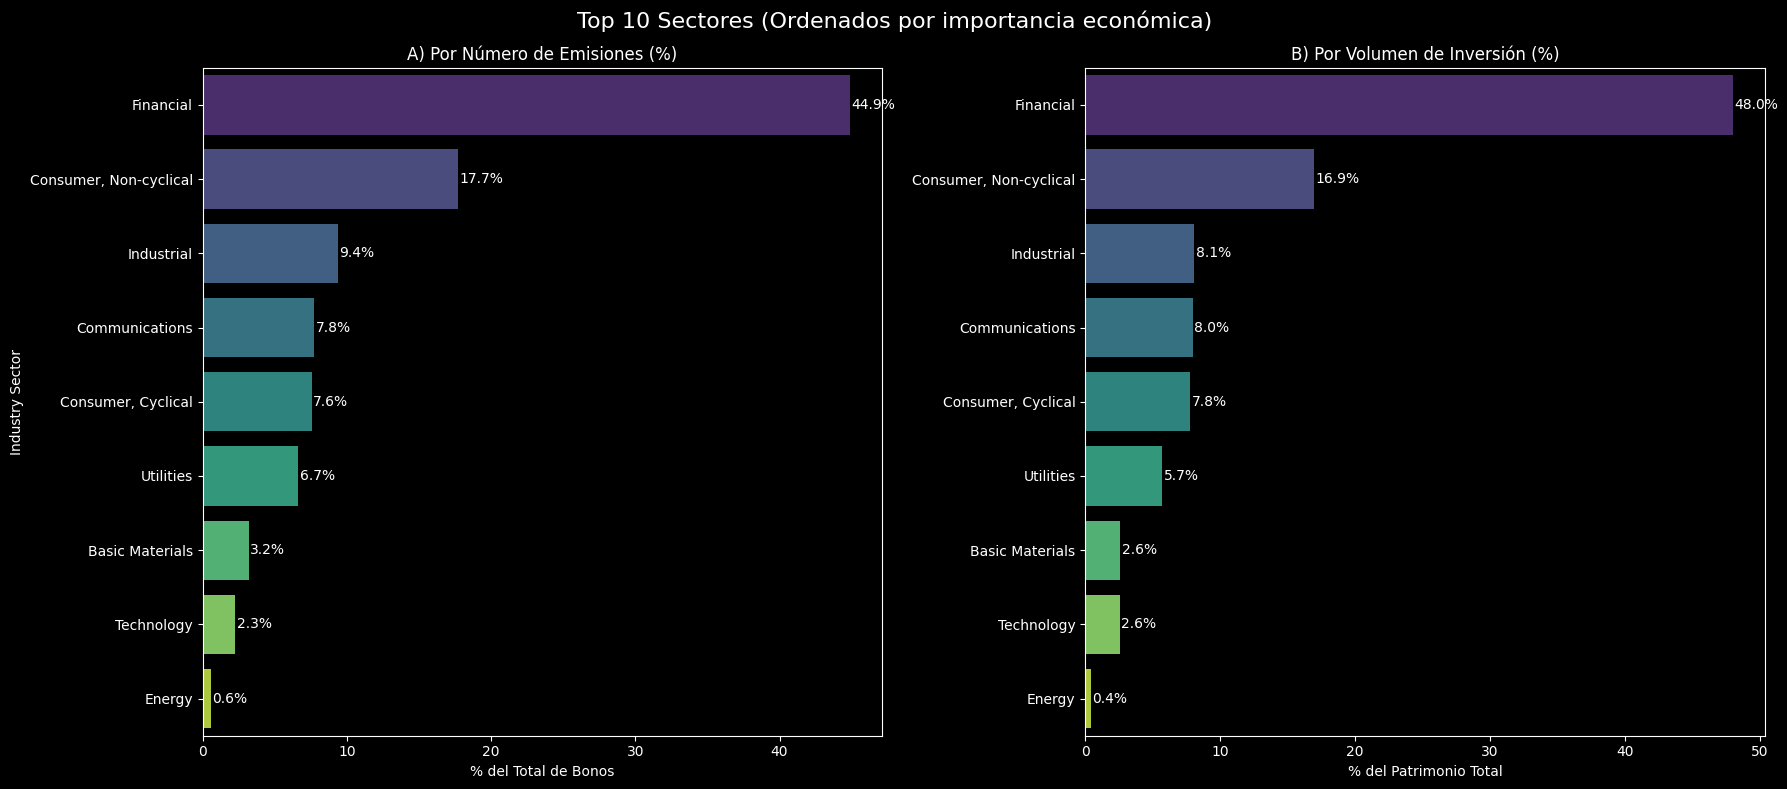

In [7]:
# --- Visualización: Distribución Sectorial (Top 10) ---

# 1. Agrupar datos por Sector
# Ordenamos por Volumen (Outstanding Amount) para sacar los 10 sectores con más dinero,
# que son los relevantes para el riesgo de cartera.
df_sector = universo.groupby('Industry Sector').agg({
    'Description': 'count',
    'Outstanding Amount': 'sum'
}).sort_values('Outstanding Amount', ascending=False).head(10)

# 2. Calcular porcentajes del total
total_count = universo['Description'].count()
total_vol = universo['Outstanding Amount'].sum()

df_sector_pct = pd.DataFrame()
df_sector_pct['Count %'] = (df_sector['Description'] / total_count) * 100
df_sector_pct['Volume %'] = (df_sector['Outstanding Amount'] / total_vol) * 100

# 3. Visualización (Orden Invertido)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 10 Sectores (Ordenados por importancia económica)', fontsize=16)

# Gráfico A: Por Número de Bonos (AHORA PRIMERO)
sns.barplot(x=df_sector_pct['Count %'], y=df_sector_pct.index, ax=axes[0], palette='viridis')
axes[0].set_title('A) Por Número de Emisiones (%)')
axes[0].set_xlabel('% del Total de Bonos')

# Etiquetas A
for i, v in enumerate(df_sector_pct['Count %']):
    axes[0].text(v + 0.1, i, f'{v:.1f}%', va='center', fontsize=10)

# Gráfico B: Por Volumen de Inversión (AHORA SEGUNDO)
sns.barplot(x=df_sector_pct['Volume %'], y=df_sector_pct.index, ax=axes[1], palette='viridis')
axes[1].set_title('B) Por Volumen de Inversión (%)')
axes[1].set_xlabel('% del Patrimonio Total')
axes[1].set_ylabel('') # Ocultamos etiquetas del eje Y para limpiar, ya que son las mismas

# Etiquetas B
for i, v in enumerate(df_sector_pct['Volume %']):
    axes[1].text(v + 0.1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### <font color=#808080>Concentración Top 10 Emisores</font>


C:\Users\javie\AppData\Local\Temp\ipykernel_48956\2863298125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


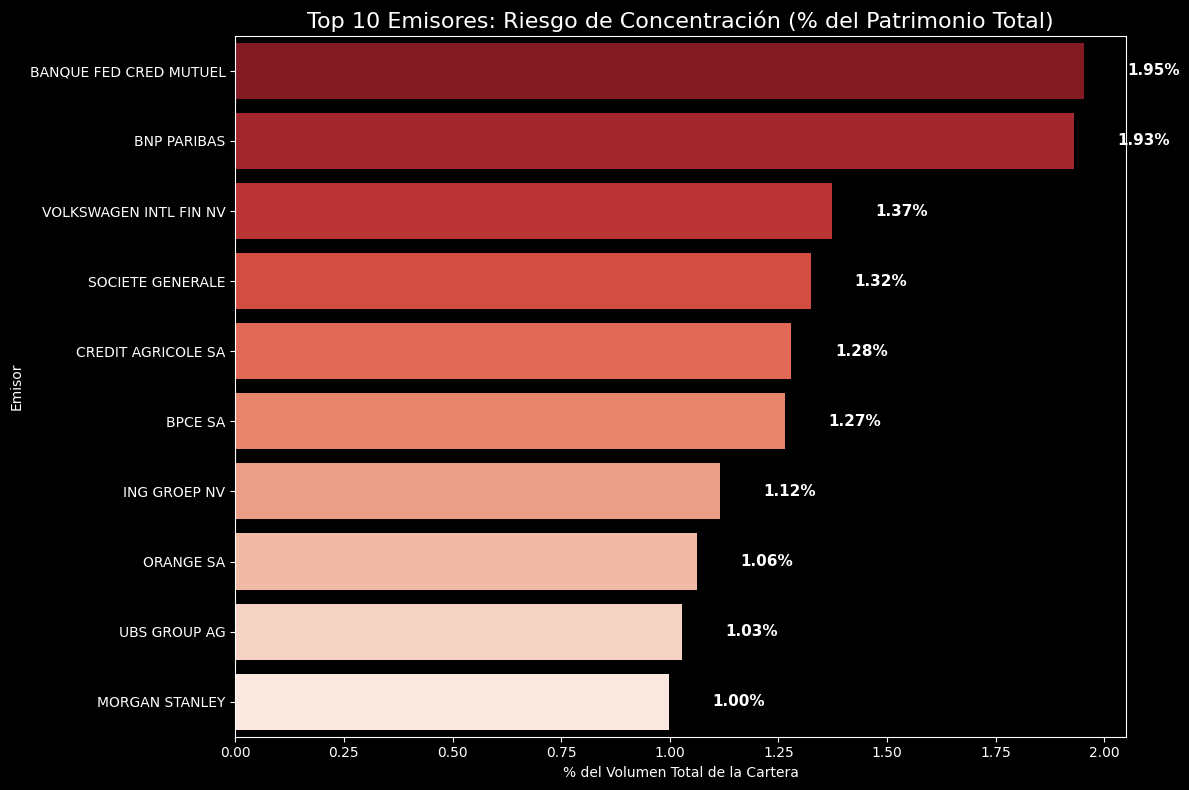

El Top 10 de emisores concentra el 13.33% del total de la cartera.


In [8]:
# --- Visualización: Top 10 Emisores por Volumen (%) ---

# 1. Agrupar por Emisor y sumar el volumen (Outstanding Amount)
top_emisores = universo.groupby('Issuer')['Outstanding Amount'].sum().sort_values(ascending=False).head(10)

# 2. Calcular el porcentaje respecto al volumen TOTAL de la cartera
total_volumen = universo['Outstanding Amount'].sum()
top_emisores_pct = (top_emisores / total_volumen) * 100

# 3. Visualización
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales
ax = sns.barplot(
    x=top_emisores_pct.values, 
    y=top_emisores_pct.index, 
    palette='Reds_r' # Usamos rojos para denotar 'Riesgo' de concentración
)

plt.title('Top 10 Emisores: Riesgo de Concentración (% del Patrimonio Total)', fontsize=16)
plt.xlabel('% del Volumen Total de la Cartera')
plt.ylabel('Emisor')

# 4. Añadir etiquetas de datos
for i, v in enumerate(top_emisores_pct.values):
    ax.text(v + 0.1, i, f'{v:.2f}%', va='center', fontsize=11, fontweight='bold')

# (Opcional) Línea de referencia de "Límite UCITS" (muchos fondos no pueden tener >5% o >10% en un emisor)
# plt.axvline(x=5, color='black', linestyle='--', label='Límite 5% (Ref. UCITS)')
# plt.legend()

plt.tight_layout()
plt.show()

# Dato extra para tu análisis escrito:
print(f"El Top 10 de emisores concentra el {top_emisores_pct.sum():.2f}% del total de la cartera.")

#### <font color=#808080>Distribución de principales</font>


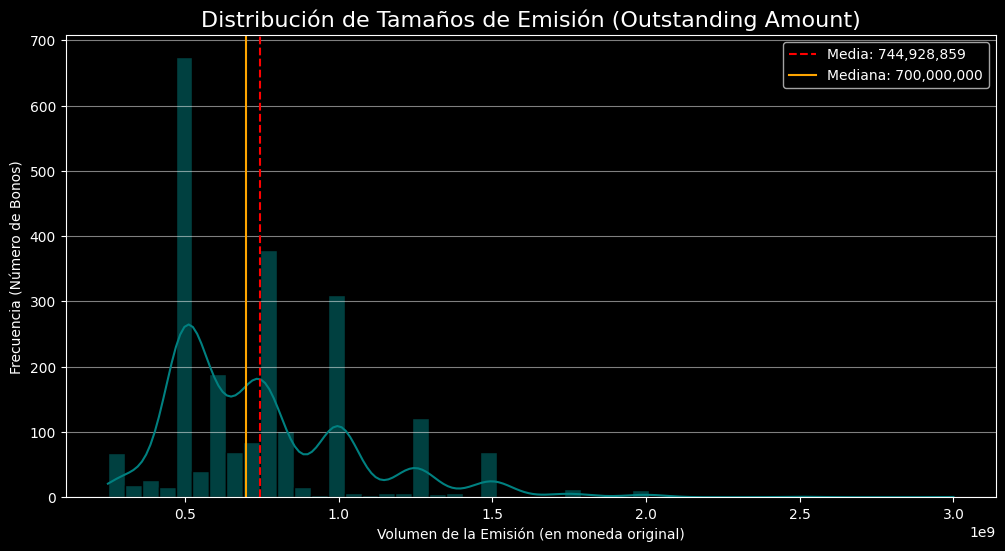

In [9]:
# --- Visualización: Histograma de Tamaños de Emisión ---

plt.figure(figsize=(12, 6))

# Creamos el histograma con curva de densidad (KDE)
sns.histplot(
    universo['Outstanding Amount'], 
    bins=50, 
    kde=True, 
    color='teal',
    edgecolor='black'
)

plt.title('Distribución de Tamaños de Emisión (Outstanding Amount)', fontsize=16)
plt.xlabel('Volumen de la Emisión (en moneda original)')
plt.ylabel('Frecuencia (Número de Bonos)')

# OPCIONAL: Si hay emisiones gigantes que "aplastan" el gráfico, descomenta esta línea:
# plt.xscale('log') 

# Añadimos líneas de media y mediana para referencia
plt.axvline(universo['Outstanding Amount'].mean(), color='red', linestyle='--', label=f"Media: {universo['Outstanding Amount'].mean():,.0f}")
plt.axvline(universo['Outstanding Amount'].median(), color='orange', linestyle='-', label=f"Mediana: {universo['Outstanding Amount'].median():,.0f}")

plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()


#### <font color=#808080>Tipos de bono</font>

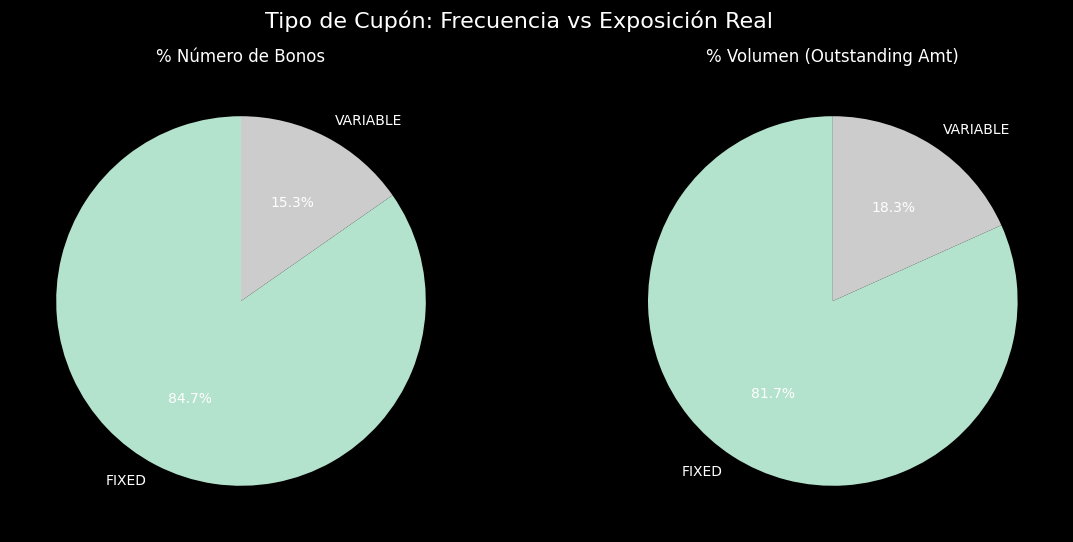

In [10]:
# --- TIPO DE CUPÓN: Conteo vs Volumen ---

# 1. Preparar datos
df_coupon = universo.groupby('Coupon Type').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Tipo de Cupón: Frecuencia vs Exposición Real', fontsize=16)

# Count
df_coupon['Description'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='Pastel2', ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Volume
df_coupon['Outstanding Amount'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Pastel2', ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amt)')

plt.show()

#### <font color=#808080>Callabale / Opcionalidad</font>

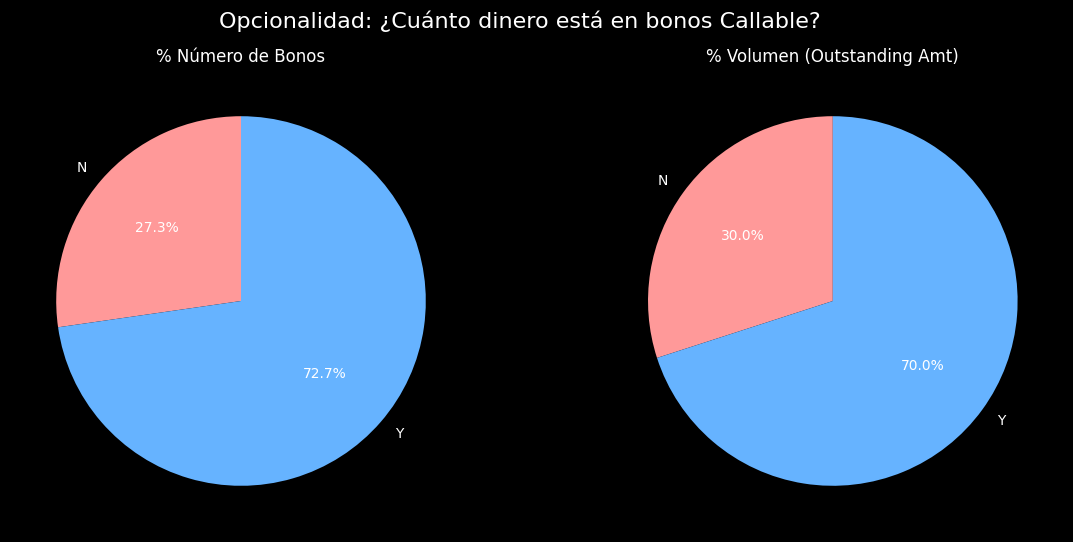

In [11]:
# --- OPCIONALIDAD: Conteo vs Volumen ---

# 1. Preparar datos
df_call = universo.groupby('Callable').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Opcionalidad: ¿Cuánto dinero está en bonos Callable?', fontsize=16)

colors_call = ['#ff9999','#66b3ff'] # Rojo/Azul suave

# Count
df_call['Description'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, colors=colors_call, ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Volume
df_call['Outstanding Amount'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, colors=colors_call, ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amt)')

plt.show()

#### <font color=#808080>Prelación / Seniority</font>

C:\Users\javie\AppData\Local\Temp\ipykernel_48956\258857196.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Description'], ax=axes[0], palette='Blues_r')
C:\Users\javie\AppData\Local\Temp\ipykernel_48956\258857196.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Outstanding Amount'], ax=axes[1], palette='Blues_r')


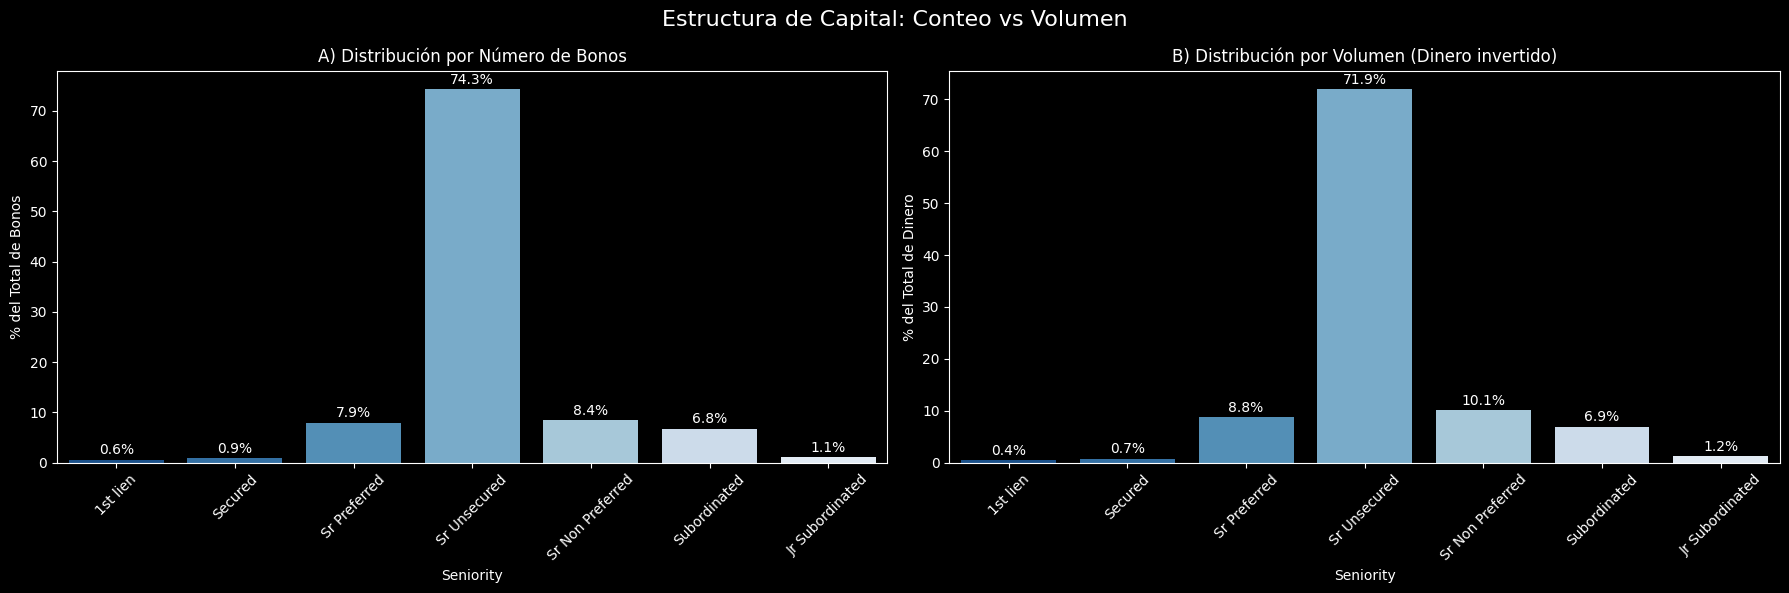

In [12]:
# --- SENIORITY: Comparativa Visual ---

# 1. Definir orden lógico
orden_seniority = [
    '1st lien', 'Secured', 'Sr Preferred', 'Sr Unsecured', 
    'Sr Non Preferred', 'Subordinated', 'Jr Subordinated'
]

# 2. Preparar datos agregados y reordenar
df_sen = universo.groupby('Seniority').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
}).reindex(orden_seniority).dropna()

# 3. Calcular porcentajes para que las barras sean comparables
df_sen_pct = df_sen.apply(lambda x: x / x.sum() * 100)

# 4. Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Estructura de Capital: Conteo vs Volumen', fontsize=16)

# Gráfico A: Count
sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Description'], ax=axes[0], palette='Blues_r')
axes[0].set_title('A) Distribución por Número de Bonos')
axes[0].set_ylabel('% del Total de Bonos')
axes[0].tick_params(axis='x', rotation=45)

# Etiquetas A
for i, v in enumerate(df_sen_pct['Description']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# Gráfico B: Volume
sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Outstanding Amount'], ax=axes[1], palette='Blues_r')
axes[1].set_title('B) Distribución por Volumen (Dinero invertido)')
axes[1].set_ylabel('% del Total de Dinero')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas B
for i, v in enumerate(df_sen_pct['Outstanding Amount']):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### <font color=#808080>Ratings (Riesgo de crédito)</font>

C:\Users\javie\AppData\Local\Temp\ipykernel_48956\1182207922.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Description'], ax=axes[0], palette='RdYlGn_r')
C:\Users\javie\AppData\Local\Temp\ipykernel_48956\1182207922.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Outstanding Amount'], ax=axes[1], palette='RdYlGn_r')


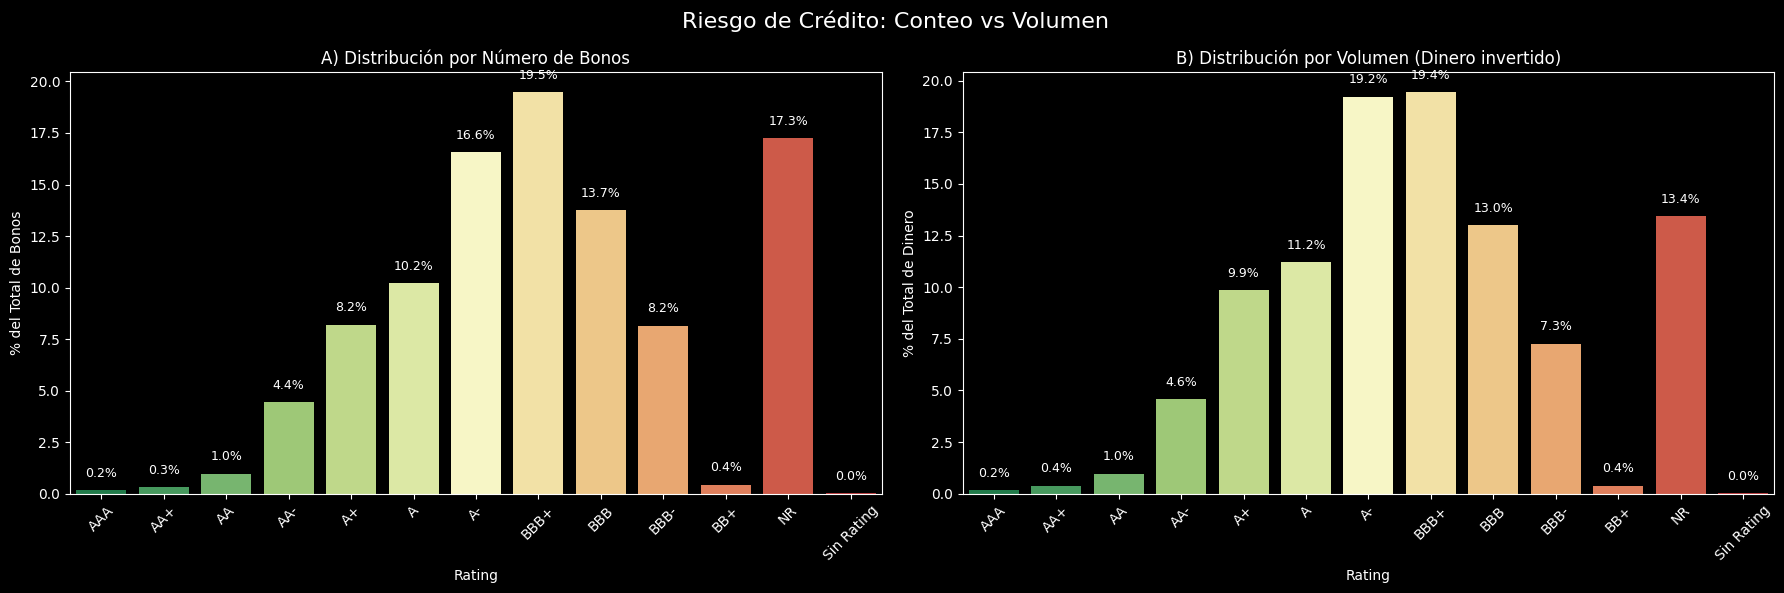

In [13]:
# --- RATINGS: Comparativa Visual ---

# 1. Definir orden lógico
orden_ratings = [
    'AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 
    'BBB+', 'BBB', 'BBB-', 'BB+', 'NR', 'Sin Rating'
]

# 2. Rellenar nulos temporalmente en el DF original para no perder su volumen
df_temp = universo.copy()
df_temp['Rating'] = df_temp['Rating'].fillna('Sin Rating')

# 3. Agrupar, reordenar y calcular porcentajes
df_rat = df_temp.groupby('Rating').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
}).reindex(orden_ratings).dropna()

df_rat_pct = df_rat.apply(lambda x: x / x.sum() * 100)

# 4. Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Riesgo de Crédito: Conteo vs Volumen', fontsize=16)

# Gráfico A: Count
sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Description'], ax=axes[0], palette='RdYlGn_r')
axes[0].set_title('A) Distribución por Número de Bonos')
axes[0].set_ylabel('% del Total de Bonos')
axes[0].tick_params(axis='x', rotation=45)

# Etiquetas A
for i, v in enumerate(df_rat_pct['Description']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

# Gráfico B: Volume
sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Outstanding Amount'], ax=axes[1], palette='RdYlGn_r')
axes[1].set_title('B) Distribución por Volumen (Dinero invertido)')
axes[1].set_ylabel('% del Total de Dinero')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas B
for i, v in enumerate(df_rat_pct['Outstanding Amount']):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### <font color=#808080>Riesgo de liquidez - Horquillas y nominal vivo</font>

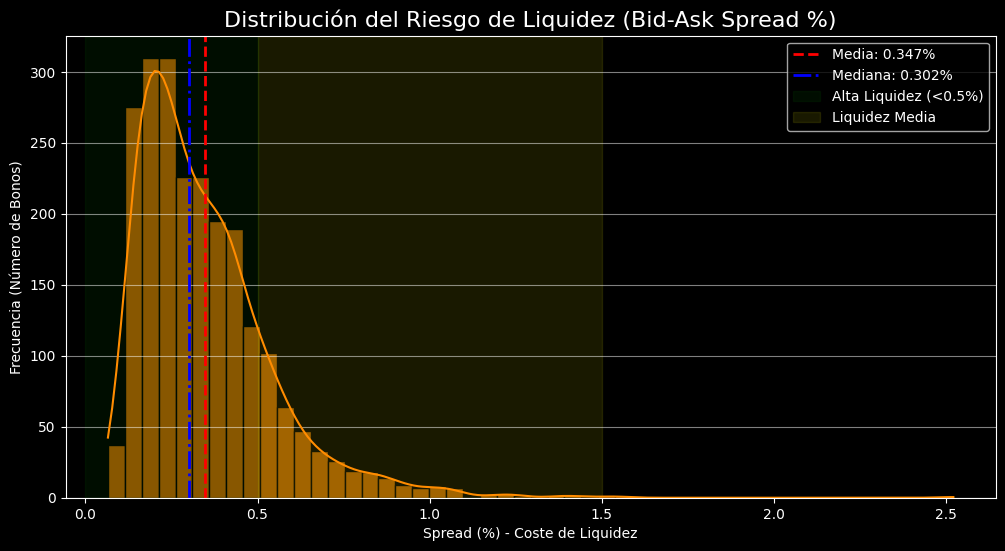

Spread Promedio: 0.347%
Spread Máximo: 2.521% (Posible iliquidez extrema)


In [14]:
# --- Visualización: Riesgo de Liquidez (Bid-Ask Spread) ---

# 1. Calcular el Spread Relativo (%)
# Fórmula: (Precio Venta - Precio Compra) / Precio Medio * 100
# Usamos 'Price' como referencia del precio medio/mercado.
universo['Bid_Ask_Spread_Pct'] = ((universo['Ask Price'] - universo['Bid Price']) / universo['Price']) * 100

# 2. Visualización
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
# Usamos un degradado o color específico. El naranja suele asociarse a precaución/liquidez.
sns.histplot(
    universo['Bid_Ask_Spread_Pct'], 
    bins=50, 
    kde=True, 
    color='darkorange',
    edgecolor='black',
    alpha=0.6
)

plt.title('Distribución del Riesgo de Liquidez (Bid-Ask Spread %)', fontsize=16)
plt.xlabel('Spread (%) - Coste de Liquidez')
plt.ylabel('Frecuencia (Número de Bonos)')

# 3. Añadir líneas de referencia (Media y Mediana)
mean_spread = universo['Bid_Ask_Spread_Pct'].mean()
median_spread = universo['Bid_Ask_Spread_Pct'].median()

plt.axvline(mean_spread, color='red', linestyle='--', linewidth=2, label=f"Media: {mean_spread:.3f}%")
plt.axvline(median_spread, color='blue', linestyle='-.', linewidth=2, label=f"Mediana: {median_spread:.3f}%")

# 4. Añadir zonas de interpretación (Opcional pero recomendado para prácticas)
# Asumiendo que >1% ya es poca liquidez en bonos corporativos IG/Gov
plt.axvspan(0, 0.5, color='green', alpha=0.1, label='Alta Liquidez (<0.5%)')
plt.axvspan(0.5, 1.5, color='yellow', alpha=0.1, label='Liquidez Media')
# El resto se deja sin sombrear o se sombrea en rojo si se conoce el límite superior

plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# Estadísticas rápidas para comentar en el texto
print(f"Spread Promedio: {mean_spread:.3f}%")
print(f"Spread Máximo: {universo['Bid_Ask_Spread_Pct'].max():.3f}% (Posible iliquidez extrema)")

C:\Users\javie\AppData\Local\Temp\ipykernel_48956\77205319.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


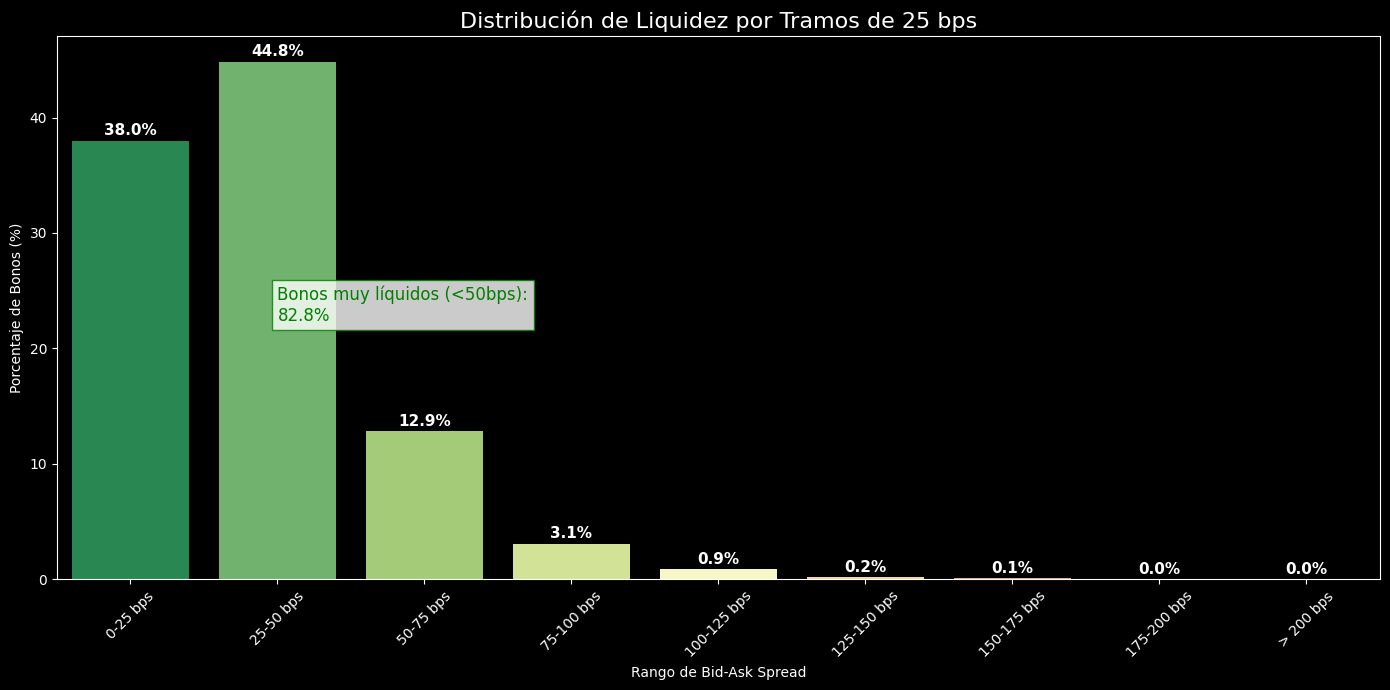

In [15]:
# --- Visualización: Liquidez por Rangos (Buckets de 25 bps) ---
import numpy as np

# 1. Asegurarnos de que tenemos la columna calculada (por si se ejecuta celda aislada)
if 'Bid_Ask_Spread_Pct' not in universo.columns:
     universo['Bid_Ask_Spread_Pct'] = ((universo['Ask Price'] - universo['Bid Price']) / universo['Price']) * 100

# 2. Definir los tramos (bins) de 25 en 25 bps
# 0.25% = 25 bps. Creamos cortes hasta 2.0% (200 bps) y un corte final al infinito.
bins = [0, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, float('inf')]

# Etiquetas para los tramos
labels = [
    '0-25 bps', '25-50 bps', '50-75 bps', '75-100 bps', 
    '100-125 bps', '125-150 bps', '150-175 bps', '175-200 bps', '> 200 bps'
]

# 3. Crear la columna de rangos
# Usamos pd.cut para asignar cada bono a su bucket
universo['Liquidity_Bucket'] = pd.cut(universo['Bid_Ask_Spread_Pct'], bins=bins, labels=labels, right=False)

# 4. Calcular porcentajes
liquidity_dist = universo['Liquidity_Bucket'].value_counts(normalize=True).sort_index() * 100

# 5. Visualización
plt.figure(figsize=(14, 7))

# Usamos una paleta divergente: Verdes (líquido) -> Amarillos -> Rojos (ilíquido)
# Como tenemos 9 categorías, generamos una paleta dinámica
ax = sns.barplot(
    x=liquidity_dist.index, 
    y=liquidity_dist.values, 
    palette='RdYlGn_r' # Invertido: Verde al principio (bajo spread), Rojo al final
)

plt.title('Distribución de Liquidez por Tramos de 25 bps', fontsize=16)
plt.xlabel('Rango de Bid-Ask Spread')
plt.ylabel('Porcentaje de Bonos (%)')
plt.xticks(rotation=45)

# 6. Añadir etiquetas de porcentaje sobre las barras
for i, v in enumerate(liquidity_dist.values):
    # Ponemos el texto un poco por encima de la barra
    ax.text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Línea acumulada (Opcional, pero muy útil): ¿Qué % está por debajo de 50bps?
# Esto dibuja una línea invisible solo para calcular el dato acumulado
acumulado_50bps = liquidity_dist['0-25 bps'] + liquidity_dist['25-50 bps']
plt.text(1, liquidity_dist.max()/2, f'Bonos muy líquidos (<50bps):\n{acumulado_50bps:.1f}%', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='green'), fontsize=12, color='green')

plt.tight_layout()
plt.show()

#### <font color=#808080>Resto de información</font>